# Part 1

In [136]:
import numpy as np

In [137]:
filename = 'day8_input'
with open(filename, 'r') as f:
    lines = f.readlines()

pixels = (list(list(lines)[0]))[:-1] # Get rid of the last "\n"
pixels = [int(pixel) for pixel in pixels]
#pixels = [0,2,2,2,1,1,2,2,2,2,1,2,0,0,0,0]

In [138]:
nrows = 25
ncolumns = 6
npixels = nrows*ncolumns

nlayers = len(pixels)//npixels
pixels = np.array(pixels)
#image_array = np.reshape(pixels, (nrows, ncolumns, nlayers))

In [139]:
image_array = np.zeros((nrows, ncolumns, nlayers))
columns = 0
for i in range(0, nlayers):
    for j in range(0, nrows):
        image_array [j, :, i] = pixels[columns:columns+ncolumns]
        columns += ncolumns

In [140]:
print(image_array[:, :, 0])
print((image_array[:, :, 0] == 0).sum())

[[1. 2. 2. 2. 2. 2.]
 [2. 2. 2. 0. 2. 1.]
 [2. 2. 2. 2. 1. 2.]
 [2. 2. 0. 2. 2. 0.]
 [0. 2. 2. 1. 2. 2.]
 [2. 0. 2. 2. 2. 2.]
 [0. 2. 2. 0. 1. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [0. 2. 2. 0. 2. 2.]
 [1. 2. 2. 2. 2. 2.]
 [2. 2. 0. 2. 1. 0.]
 [0. 0. 0. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 1. 1. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [0. 2. 2. 0. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2.]]
17


In [141]:
zero_count, layer_count = None, None

for i in range(nlayers):
    temp = (image_array[:, :, i] == 0).sum()
    
    if(zero_count == None):
        zero_count = temp
        layer_count = i
    else:
        if(temp < zero_count):
            zero_count = temp
            layer_count = i
            
print(zero_count, layer_count)

6 6


In [142]:
one_count = (image_array[:, :, layer_count] == 1).sum()
two_count = (image_array[:, :, layer_count] == 2).sum()

print(one_count*two_count, one_count, two_count)

1584 12 132


# Part 2

In [143]:
#
decoded_image = np.zeros((nrows, ncolumns))

for i in range(nrows):
    for j in range(ncolumns):
        pixel_list = image_array[i, j, :]
        
        for pixel in pixel_list:
            if(pixel == 0):
                decoded_image[i, j] = 0
                break
            if(pixel == 1):
                decoded_image[i, j] = 1
                break
        
        print(pixel_list, decoded_image[i, j])
                
            
        #print(pixel_list, temp_output)
        #decoded_image[i, j] = 1 if(temp_output == True) else 0

[1. 0. 0. 1. 2. 0. 2. 1. 1. 1. 2. 2. 2. 0. 1. 0. 1. 0. 1. 2. 2. 1. 0. 1.
 0. 0. 0. 0. 2. 0. 2. 1. 1. 0. 2. 2. 2. 0. 0. 0. 0. 0. 1. 0. 1. 2. 1. 0.
 0. 2. 0. 0. 2. 2. 2. 1. 2. 1. 0. 0. 2. 1. 1. 0. 1. 0. 1. 2. 0. 2. 2. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 2. 1. 1. 2. 2. 2. 0. 2. 0. 1. 0. 2. 0. 0. 1. 2.
 1. 1. 0. 0.] 1.0
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 1. 1. 0. 1. 0. 1. 1. 1. 0. 2. 1. 1. 0. 1. 0. 2. 2. 2.
 1. 0. 1. 0.] 0.0
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 1. 1. 1. 0. 2. 2. 1. 2. 1. 1. 2. 0. 2. 1. 2. 1. 2. 1.
 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 1. 2. 1. 1. 2. 0. 1. 2. 1. 2. 0. 2. 2. 1.
 2. 0. 1. 0.] 0.0
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 

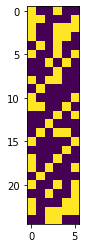

In [144]:
from matplotlib import pyplot as plt

plt.imshow(decoded_image)

plt.show()

In [145]:
decoded_image.shape

(25, 6)

In [146]:
len(image_array[0, 0, :])

100

In [87]:
test_image_array = np.array([0,2,2,2,1,1,2,2,2,2,1,2,0,0,0,0])
test_image_array = np.reshape(test_image_array, (2, 2, 4))
test_image_array.shape

for i in range(4):
    print(test_image_array[0, 0, i])

0
2
2
2


In [88]:
#
decoded_image = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        pixel_list = test_image_array[i, j, :]
        
        for pixel in pixel_list:
            if(pixel == 0):
                decoded_image[i, j] = 0
                break
            if(pixel == 1):
                decoded_image[i, j] = 1
                break
        
        print(pixel_list, decoded_image[i, j])
                
            
        #print(pixel_list, temp_output)
        #decoded_image[i, j] = 1 if(temp_output == True) else 0

[0 2 2 2] 0.0
[1 1 2 2] 1.0
[2 2 1 2] 1.0
[0 0 0 0] 0.0


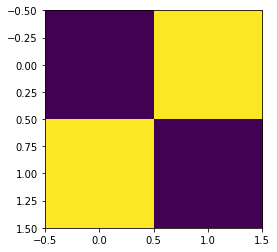

In [89]:
plt.imshow(decoded_image)